# Problem 1: Speech Denoising Using Deep Learning

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import math
import librosa
import tensorflow as tf
import tensorflow_addons as tfa
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Audio
from PIL import Image

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [ ]:
S = np.abs(S).T
X = np.abs(X).T

In [ ]:
# Use Xavier initialization and ReLu activation function at each layer
init_dnn = tf.keras.initializers.GlorotNormal()
model_dnn = tf.keras.models.Sequential([
          tf.keras.layers.Dense(1024, input_dim=513,activation='relu',kernel_initializer=init_dnn),
          tf.keras.layers.Dense(1024,activation='relu'),
          tf.keras.layers.Dense(513,activation='relu'),
 ])


In [ ]:
# Use adam optimizer with mse loss function
model_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mse',metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
hist_dnn = model_dnn.fit(X,S,epochs=500, batch_size=32, callbacks=[callback])

Epoch 1/500
77/77 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.1086
Epoch 2/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.2403
Epoch 3/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.3152
Epoch 4/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.3505
Epoch 5/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.3815
Epoch 6/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.4030
Epoch 7/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.4075
Epoch 8/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.4266
Epoch 9/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.4237
Epoch 10/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.4364
Epoch 11/

#### Test on test_x_01.wav

In [ ]:
sn1, sr = librosa.load('test_x_01.wav',sr=None)
X_test_1 = librosa.stft(sn1, n_fft=1024, hop_length = 512)
X_test_1_abs = np.abs(X_test_1)

In [ ]:
S_test_1 = model_dnn.predict(X_test_1_abs.T)

5/5 [==============================] - 0s 3ms/step


In [ ]:
S1_hat = np.multiply(np.divide(X_test_1, X_test_1_abs),S_test_1.T)

In [ ]:
s1_hat = librosa.istft(S1_hat, hop_length = 512, length = sn1.shape[0])

In [ ]:
s1, sr = librosa.load('test_s_01.wav',sr=None)

In [ ]:
SNR = 10.0 * math.log10( np.dot(s1_hat.T, s1_hat)/np.dot((s1-s1_hat).T, (s1-s1_hat)) )

In [ ]:
SNR

8.679868005854718

#### Predict denoise result for test_x_02.wav

In [ ]:
sn2, sr = librosa.load('test_x_02.wav',sr=None)
X_test_2 = librosa.stft(sn2, n_fft=1024, hop_length = 512)
X_test_2_abs = np.abs(X_test_2)

In [ ]:
S_test_2 = model_dnn.predict(X_test_2_abs.T)

12/12 [==============================] - 0s 1ms/step


In [ ]:
S2_hat = np.multiply(np.divide(X_test_2, X_test_2_abs),S_test_2.T)

In [ ]:
s2_hat_dnn = librosa.istft(S2_hat, hop_length = 512, length = sn2.shape[0])

In [ ]:
# Play the audio of denoised speech
Audio(s2_hat_dnn, rate = sr)

# Speech Denoising Using 1D CNN

In [ ]:
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [ ]:
S = np.abs(S).T
X = np.abs(X).T

In [ ]:
init_cnn = tf.keras.initializers.GlorotNormal()
model_cnn = tf.keras.models.Sequential([
          tf.keras.layers.Conv1D(filters= 16, kernel_size=4, padding='valid', activation='relu',input_shape=(513,1),kernel_initializer=init_cnn),
          tf.keras.layers.MaxPooling1D(pool_size=2,strides=2),
          tf.keras.layers.Conv1D(filters= 16, kernel_size=2, padding='valid', activation='relu'),
          tf.keras.layers.MaxPooling1D(pool_size=2,strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dense(513, activation='relu')
 ])

In [ ]:
# Use adam optimizer with mse loss function
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mse',metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
hist_cnn = model_cnn.fit(X,S,epochs=500, batch_size=32, callbacks=[callback])

Epoch 1/500
77/77 [==============================] - 6s 5ms/step - loss: 0.0743 - accuracy: 0.0439
Epoch 2/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0538 - accuracy: 0.1041
Epoch 3/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0414 - accuracy: 0.1440
Epoch 4/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.2212
Epoch 5/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.2700
Epoch 6/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.3062
Epoch 7/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.3367
Epoch 8/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0141 - accuracy: 0.3432
Epoch 9/500
77/77 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.3640
Epoch 10/500
77/77 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.3778
Epoch 11/

#### Test on test_x_01.wav

In [ ]:
sn1, sr = librosa.load('test_x_01.wav',sr=None)
X_test_1 = librosa.stft(sn1, n_fft=1024, hop_length = 512)
X_test_1_abs = np.abs(X_test_1).T
X_test_1_abs_reshaped = X_test_1_abs.reshape(142,513,1)

In [ ]:
S_test_1 = model_cnn.predict(X_test_1_abs_reshaped)

5/5 [==============================] - 0s 17ms/step


In [ ]:
S1_hat = np.multiply(np.divide(X_test_1, X_test_1_abs.T),S_test_1.T)

In [ ]:
s1_hat = librosa.istft(S1_hat, hop_length = 512, length = sn1.shape[0])

In [ ]:
s1, sr = librosa.load('test_s_01.wav',sr=None)

In [ ]:
SNR = 10.0 * math.log10( np.dot(s1_hat.T, s1_hat)/np.dot((s1-s1_hat).T, (s1-s1_hat)) )

In [ ]:
SNR

8.797299300048069

#### Predict denoise result for test_x_02.wav

In [ ]:
sn2, sr = librosa.load('test_x_02.wav',sr=None)
X_test_2 = librosa.stft(sn2, n_fft=1024, hop_length = 512)
X_test_2_abs = np.abs(X_test_2).T
X_test_2_abs_reshaped = X_test_2_abs.reshape(380,513,1)

In [ ]:
S_test_2 = model_cnn.predict(X_test_2_abs_reshaped)

12/12 [==============================] - 0s 4ms/step


In [ ]:
S2_hat = np.multiply(np.divide(X_test_2, X_test_2_abs.T),S_test_2.T)

In [ ]:
s2_hat_cnn = librosa.istft(S2_hat, hop_length = 512, length = sn2.shape[0])

In [ ]:
# Play the audio of denoised speech
Audio(s2_hat_cnn, rate = sr)

# Problem 3: Data Augmentation

In [ ]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
x_train = (x_train/255)*2-1
x_test = (x_test/255)*2-1

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
initializer = tf.keras.initializers.HeNormal()
base = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu',input_shape=x_train.shape[1:],kernel_initializer=initializer),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(20, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
 ])

In [ ]:
base.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
hist_base = base.fit(x_train,y_train,epochs=200, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/200
352/352 [==============================] - 4s 6ms/step - loss: 1.7672 - sparse_categorical_accuracy: 0.3513 - val_loss: 1.5435 - val_sparse_categorical_accuracy: 0.4366
Epoch 2/200
352/352 [==============================] - 1s 4ms/step - loss: 1.4534 - sparse_categorical_accuracy: 0.4734 - val_loss: 1.4010 - val_sparse_categorical_accuracy: 0.4932
Epoch 3/200
352/352 [==============================] - 1s 4ms/step - loss: 1.3541 - sparse_categorical_accuracy: 0.5157 - val_loss: 1.3343 - val_sparse_categorical_accuracy: 0.5196
Epoch 4/200
352/352 [==============================] - 1s 4ms/step - loss: 1.2893 - sparse_categorical_accuracy: 0.5431 - val_loss: 1.2874 - val_sparse_categorical_accuracy: 0.5410
Epoch 5/200
352/352 [==============================] - 1s 4ms/step - loss: 1.2404 - sparse_categorical_accuracy: 0.5619 - val_loss: 1.2537 - val_sparse_categorical_accuracy: 0.5588
Epoch 6/200
352/352 [==============================] - 2s 4ms/step - loss: 1.1996 - sparse_cate

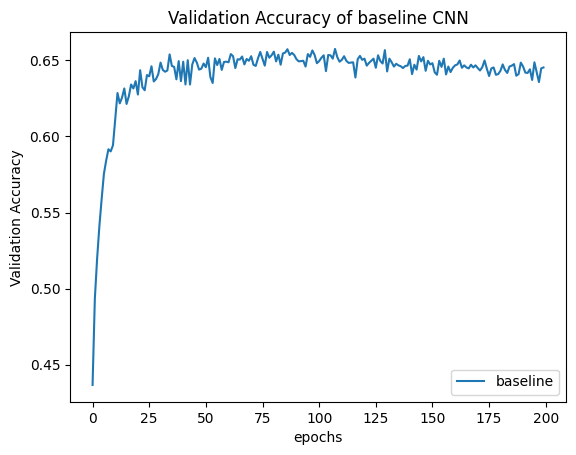

In [ ]:
plt.plot(hist_base.history['val_sparse_categorical_accuracy'])
plt.title('Validation Accuracy of baseline CNN')
plt.ylabel('Validation Accuracy')
plt.xlabel('epochs')
plt.legend(['baseline'], loc='lower right')
plt.show()

#### Build another classifier using augmented data

In [ ]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
x_train_aug1 = np.minimum(x_train*1.1,1)
x_train_aug2 = x_train * 0.9
x_train_aug3 = np.flip(x_train,axis=2)

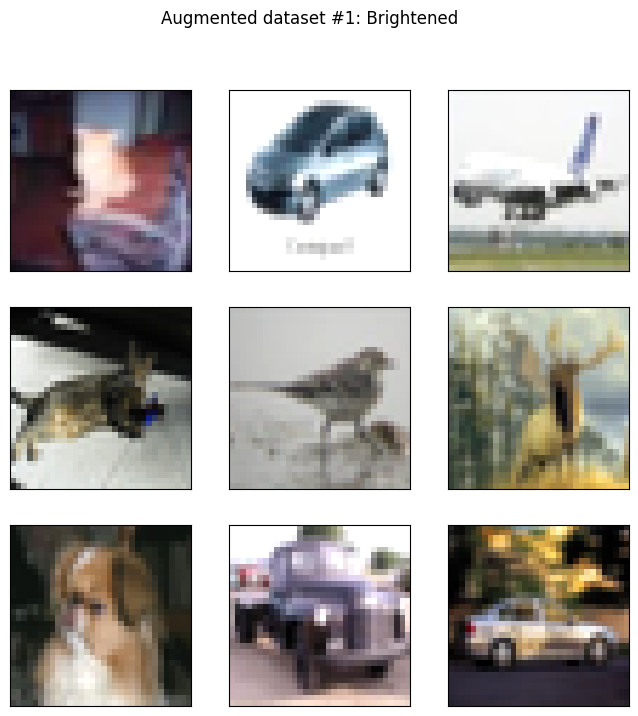

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_aug1[i], cmap=plt.cm.binary)
plt.suptitle('Augmented dataset #1: Brightened')
plt.show()

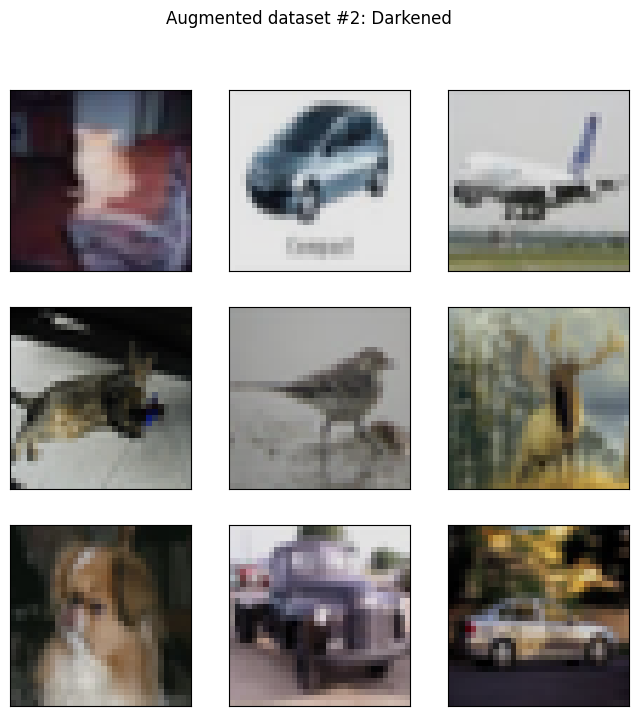

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_aug2[i], cmap=plt.cm.binary)
plt.suptitle('Augmented dataset #2: Darkened')
plt.show()

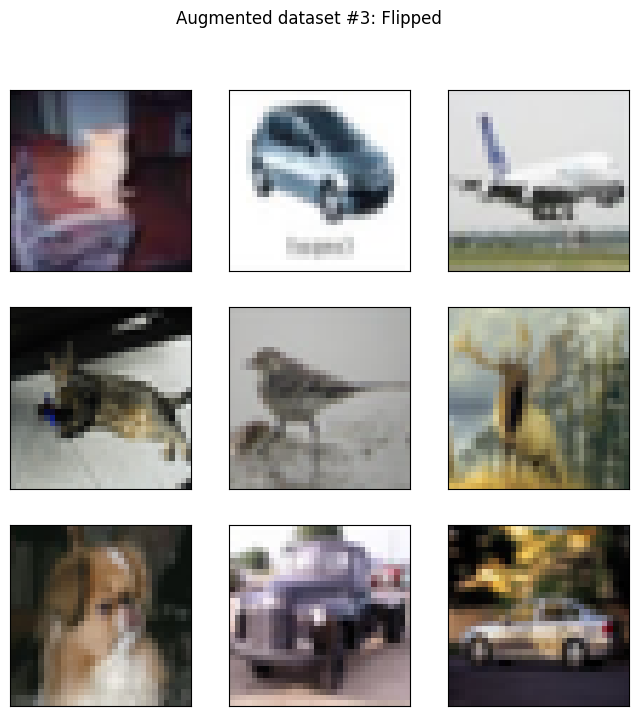

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_aug3[i], cmap=plt.cm.binary)
plt.suptitle('Augmented dataset #3: Flipped')
plt.show()

In [ ]:
x_train_aug = np.concatenate((x_train_aug1*2-1, x_train_aug2*2-1,x_train_aug3*2-1,x_train*2-1))

In [ ]:
y_train_aug = np.concatenate((y_train, y_train,y_train,y_train))

In [ ]:
x_val = x_val * 2 - 1

In [ ]:
initializer = tf.keras.initializers.HeNormal()
base_aug = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu',input_shape=x_train_aug.shape[1:],kernel_initializer=initializer),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(20, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
 ])

In [ ]:
base_aug.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
hist_base_aug = base_aug.fit(x_train_aug,y_train_aug,epochs=200, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/200
1407/1407 [==============================] - 7s 4ms/step - loss: 1.5047 - sparse_categorical_accuracy: 0.4558 - val_loss: 1.2783 - val_sparse_categorical_accuracy: 0.5444
Epoch 2/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2083 - sparse_categorical_accuracy: 0.5751 - val_loss: 1.1732 - val_sparse_categorical_accuracy: 0.5824
Epoch 3/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1193 - sparse_categorical_accuracy: 0.6107 - val_loss: 1.1327 - val_sparse_categorical_accuracy: 0.5994
Epoch 4/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0644 - sparse_categorical_accuracy: 0.6311 - val_loss: 1.0723 - val_sparse_categorical_accuracy: 0.6206
Epoch 5/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.0226 - sparse_categorical_accuracy: 0.6456 - val_loss: 1.0262 - val_sparse_categorical_accuracy: 0.6346
Epoch 6/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.9919 -

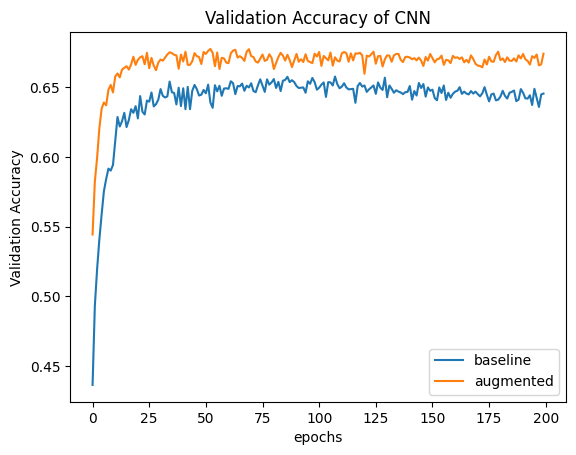

In [ ]:
plt.plot(hist_base.history['val_sparse_categorical_accuracy'])
plt.plot(hist_base_aug.history['val_sparse_categorical_accuracy'])
plt.title('Validation Accuracy of CNN')
plt.ylabel('Validation Accuracy')
plt.xlabel('epochs')
plt.legend(['baseline', 'augmented'], loc='lower right')
plt.show()

# Problem 4: Self-Supervised Learning via Pretext Tasks

In [ ]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### The pretext task:

In [ ]:
x_train_0, x_train_aside = x_train[:-500], x_train[-500:]
y_train_aside = y_train[-500:]

In [ ]:
x_train_1 = np.flip(x_train_0,axis=1)
x_train_2 = np.rot90(x_train_0,axes=(1,2))

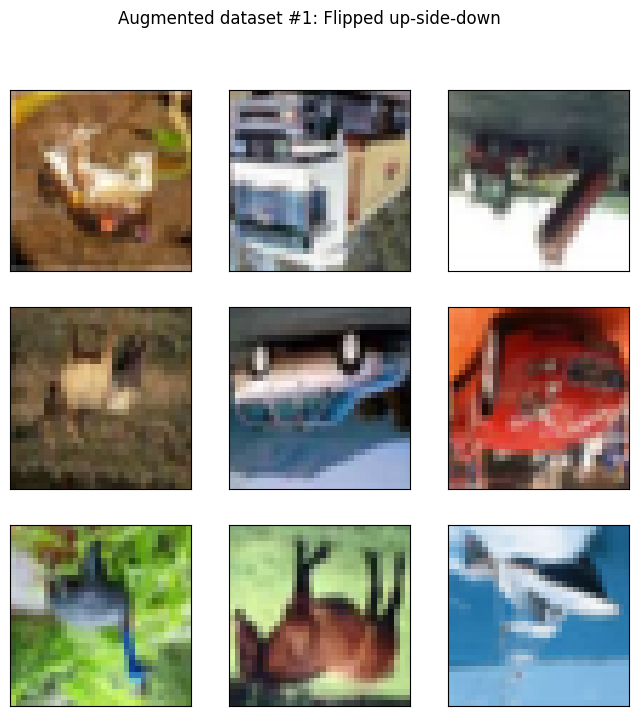

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_1[i], cmap=plt.cm.binary)
plt.suptitle('Augmented dataset #1: Flipped up-side-down')
plt.show()

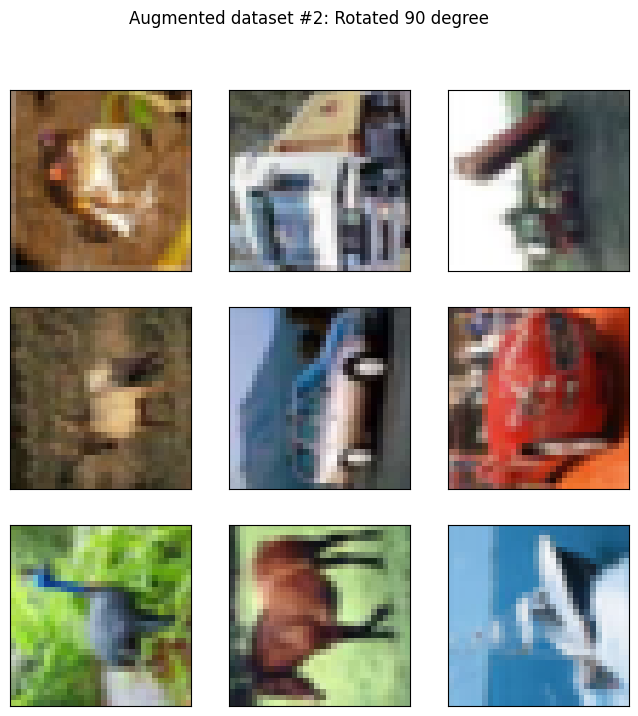

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_2[i], cmap=plt.cm.binary)
plt.suptitle('Augmented dataset #2: Rotated 90 degree')
plt.show()

In [ ]:
y_train_0=np.zeros((49500,1))
y_train_1=np.ones((49500,1))
y_train_2=np.ones((49500,1))*2

In [ ]:
x_train_rest = np.concatenate((x_train_0*2-1,x_train_1*2-1,x_train_2*2-1))
y_train_rest = np.concatenate((y_train_0,y_train_1,y_train_2))

In [ ]:
initializer = tf.keras.initializers.HeNormal()
pretext = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu',input_shape=x_train_rest.shape[1:],kernel_initializer=initializer),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(20, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
 ])

In [ ]:
pretext.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
hist_pretext = pretext.fit(x_train_rest,y_train_rest,epochs=100, batch_size=512)

Epoch 1/100
291/291 [==============================] - 3s 7ms/step - loss: 0.9440 - sparse_categorical_accuracy: 0.5464
Epoch 2/100
291/291 [==============================] - 2s 7ms/step - loss: 0.8091 - sparse_categorical_accuracy: 0.6323
Epoch 3/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7771 - sparse_categorical_accuracy: 0.6516
Epoch 4/100
291/291 [==============================] - 3s 9ms/step - loss: 0.7578 - sparse_categorical_accuracy: 0.6626
Epoch 5/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7403 - sparse_categorical_accuracy: 0.6737
Epoch 6/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7295 - sparse_categorical_accuracy: 0.6804
Epoch 7/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7190 - sparse_categorical_accuracy: 0.6870
Epoch 8/100
291/291 [==============================] - 2s 7ms/step - loss: 0.7103 - sparse_categorical_accuracy: 0.6912
Epoch 9/100
291/291 [===================

#### The baseline:

In [ ]:
initializer = tf.keras.initializers.HeNormal()
baseline = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu',input_shape=x_train_aside.shape[1:],kernel_initializer=initializer),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(20, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
 ])

In [ ]:
baseline.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
hist_baseline = baseline.fit(x_train_aside,y_train_aside,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
16/16 [==============================] - 3s 80ms/step - loss: 2.3135 - sparse_categorical_accuracy: 0.1200 - val_loss: 2.3047 - val_sparse_categorical_accuracy: 0.1102
Epoch 2/1000
16/16 [==============================] - 1s 41ms/step - loss: 2.2833 - sparse_categorical_accuracy: 0.1680 - val_loss: 2.2908 - val_sparse_categorical_accuracy: 0.1459
Epoch 3/1000
16/16 [==============================] - 1s 42ms/step - loss: 2.2588 - sparse_categorical_accuracy: 0.1940 - val_loss: 2.2791 - val_sparse_categorical_accuracy: 0.1326
Epoch 4/1000
16/16 [==============================] - 1s 42ms/step - loss: 2.2372 - sparse_categorical_accuracy: 0.1820 - val_loss: 2.2564 - val_sparse_categorical_accuracy: 0.1633
Epoch 5/1000
16/16 [==============================] - 1s 42ms/step - loss: 2.2034 - sparse_categorical_accuracy: 0.2040 - val_loss: 2.2419 - val_sparse_categorical_accuracy: 0.1586
Epoch 6/1000
16/16 [==============================] - 1s 41ms/step - loss: 2.1608 - sparse_cate

#### The transfer learning task:

In [ ]:
transfer = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu',input_shape=x_train_aside.shape[1:]),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Conv2D(filters= 10, kernel_size=(5,5), strides=1, activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(20, activation='relu'),
 ])

In [ ]:
transfer_weight = tf.keras.models.Model(inputs=pretext.input, outputs=pretext.layers[-2].output)
transfer_weight.save_weights('transfer_weight')

In [ ]:
initializer = tf.keras.initializers.HeNormal()
transfer.load_weights('transfer_weight')
transfer.add(tf.keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer))

In [ ]:
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-5),
    tf.keras.optimizers.Adam(learning_rate=1e-3)
]
optimizers_and_layers = [(optimizers[0], transfer.layers[:-1]), (optimizers[1], transfer.layers[-1:])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)
transfer.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
hist_transfer = transfer.fit(x_train_aside,y_train_aside,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
16/16 [==============================] - 3s 83ms/step - loss: 3.7853 - sparse_categorical_accuracy: 0.1000 - val_loss: 3.6329 - val_sparse_categorical_accuracy: 0.0973
Epoch 2/1000
16/16 [==============================] - 1s 41ms/step - loss: 3.4809 - sparse_categorical_accuracy: 0.0860 - val_loss: 3.3613 - val_sparse_categorical_accuracy: 0.0959
Epoch 3/1000
16/16 [==============================] - 1s 42ms/step - loss: 3.2398 - sparse_categorical_accuracy: 0.0840 - val_loss: 3.1468 - val_sparse_categorical_accuracy: 0.0933
Epoch 4/1000
16/16 [==============================] - 1s 41ms/step - loss: 3.0434 - sparse_categorical_accuracy: 0.0840 - val_loss: 2.9690 - val_sparse_categorical_accuracy: 0.0963
Epoch 5/1000
16/16 [==============================] - 1s 42ms/step - loss: 2.8785 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.8272 - val_sparse_categorical_accuracy: 0.0959
Epoch 6/1000
16/16 [==============================] - 1s 42ms/step - loss: 2.7455 - sparse_cate

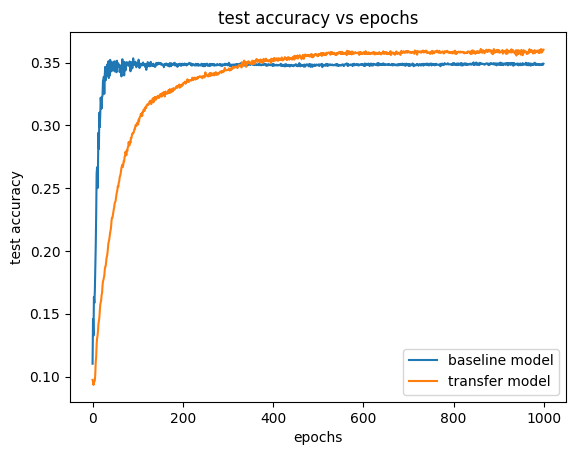

In [ ]:
plt.plot(hist_baseline.history['val_sparse_categorical_accuracy'])
plt.plot(hist_transfer.history['val_sparse_categorical_accuracy'])
plt.title('test accuracy vs epochs')
plt.ylabel('test accuracy')
plt.xlabel('epochs')
plt.legend(['baseline model','transfer model'], loc='lower right')
plt.show()